In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/oxana/Documents/Test_task/dataset_ymarket_offers.csv')

In [3]:
df.head()

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit
0,77107114,1193986,1.0,36.36,0.0,0.0,0.0,0.0,0.0
1,77107114,1232594,2.0,20.88,0.0,0.0,0.0,0.0,0.0
2,77107114,1250757,1.0,3.96,0.0,0.0,0.0,0.0,0.0
3,77107114,1399884,1.0,3.96,0.0,0.0,0.0,0.0,0.0
4,77107114,1497759,93.0,1588.68,10.6,25773.0,6.0,14394.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            44904 non-null  int64  
 1   offer_id            44904 non-null  int64  
 2   clicks              44904 non-null  float64
 3   cost                44904 non-null  float64
 4   orders_number       44904 non-null  float64
 5   revenue_value       44904 non-null  float64
 6   orders_number_conf  44904 non-null  float64
 7   revenue_value_conf  44904 non-null  float64
 8   profit              44904 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB


Описание данных:   

- store_id – id магазина   
- offer_id – id товара   
- clicks – количество кликов по данному товару   
- cost – расходы (стоимость кликов по данному товару)   
- orders_number – общее количество размещенных заказов по товару   
- revenue_value - доход с размещенных заказов   
- orders_number_conf – количество выкупленных заказов    
- revenue_value_conf –доход с выкупленных заказов   
- profit – прибыль

In [5]:
df['store_id'].nunique()

86

86 магазинов

In [6]:
df[df['profit'] == df['profit'].max()]

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit
28620,77107113,5820842,969.0,39313.44,35.174265,1.059702e+06,24.165376,736541.138495,122080.125412


Чтобы выделить «полезную» выборку, берем только позиции, у которых кликов больше 3 и доход больше 1000р

In [7]:
good = df.query('clicks > 3 and revenue_value > 1000').reset_index(drop=True)
good.head()

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit
0,77107114,1497759,93.0,1588.68,10.6,25773.0,6.0,14394.0,0.000000
1,77107114,1695942,14.0,309.60,1.0,2290.0,1.0,2290.0,410.934753
2,77107114,2210276,4.0,53.64,1.2,2268.0,1.2,2268.0,464.114240
3,77107114,2341115,17.0,196.92,2.2,4126.6,2.2,4126.6,1519.323708
4,77107114,2593760,8.0,190.80,1.2,3588.0,1.2,3588.0,1109.601108


In [8]:
len(good)

2701

In [9]:
top = good.groupby('offer_id').agg({'revenue_value':'sum', 'cost':'sum'}).sort_values(by='revenue_value', ascending=False).head(10)
top

,revenue_value,cost
offer_id,,
5818796,5.051154e+06,102104.64
5846399,2.547206e+06,88115.76
5596109,2.257044e+06,74913.12
5820842,1.955742e+06,65416.32
5846393,1.891166e+06,59826.96
5815295,1.627492e+06,135982.80
5877776,1.495935e+06,58836.60
5815313,1.467596e+06,73591.92
5635709,1.441815e+06,16620.48


Постройте график – распределение расходов и дохода по топ 10 прибыльным offer_id (здесь независимо от магазина)

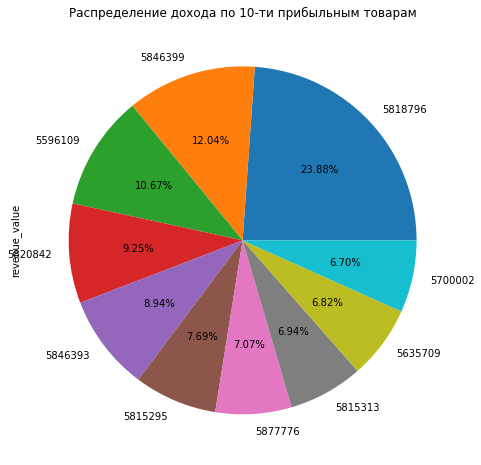

In [10]:
top.plot(kind='pie', y='revenue_value', autopct='%1.2f%%', figsize=(8,8), legend=None, 
         title='Распределение дохода по 10-ти прибыльным товарам');

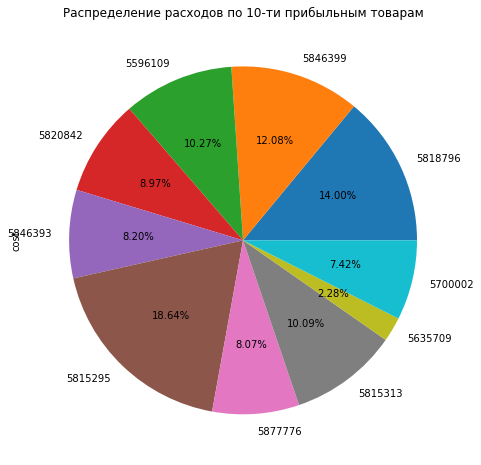

In [11]:
top.plot(kind='pie', y='cost', autopct='%1.2f%%', figsize=(8,8), legend=None, 
         title='Распределение расходов по 10-ти прибыльным товарам');

In [12]:
good.head()

,store_id,offer_id,clicks,cost,orders_number,revenue_value,orders_number_conf,revenue_value_conf,profit
0,77107114,1497759,93.0,1588.68,10.6,25773.0,6.0,14394.0,0.000000
1,77107114,1695942,14.0,309.60,1.0,2290.0,1.0,2290.0,410.934753
2,77107114,2210276,4.0,53.64,1.2,2268.0,1.2,2268.0,464.114240
3,77107114,2341115,17.0,196.92,2.2,4126.6,2.2,4126.6,1519.323708
4,77107114,2593760,8.0,190.80,1.2,3588.0,1.2,3588.0,1109.601108


In [13]:
good['offer_id'].nunique()

842

842 товара всего

In [14]:
data = good.groupby(['store_id', 'offer_id']).agg({'cost':'sum', 
                                                   'revenue_value':'sum', 
                                                   'revenue_value_conf':'sum',
                                                   'profit':'sum'}).reset_index()

**связка магазин + товар**   
CRR cost revenue ratio - ДРР доля рекламных расходов в процентах.   
ROAS посчитан к единице инвестированного рубля.   
Хорошо бы добавить расчет метрики ROMI, которая отражает возврат рекламных инвестиций с учетом себестоимости товара/заказа

In [15]:
data['crr'] = data['cost'] / data['revenue_value'] * 100
data['crr_conf'] = data['cost'] / data['revenue_value_conf'] * 100
data['roas'] = data['revenue_value'] / data['cost']
data['roas_conf'] = data['revenue_value_conf'] / data['cost']
data['romi'] = data['profit'] / data['cost'] * 100

In [16]:
data.head()

,store_id,offer_id,cost,revenue_value,revenue_value_conf,profit,crr,crr_conf,roas,roas_conf,romi
0,77107113,1456613,110.88,2232.00,0.0,0.000000,4.967742,inf,20.129870,0.000000,0.000000
1,77107113,1497759,4207.68,112302.56,89471.6,588.586800,3.746736,4.702811,26.689900,21.263879,13.988393
2,77107113,1537663,501.84,2148.00,2148.0,428.243153,23.363128,23.363128,4.280249,4.280249,85.334599
3,77107113,1695942,1293.84,6840.00,6840.0,1210.010045,18.915789,18.915789,5.286589,5.286589,93.520841
4,77107113,1901080,156.24,7555.80,6476.4,2711.312597,2.067815,2.412451,48.360215,41.451613,1735.351124


Найти примеры товаров, где ДРР по размещенному заказу хорошее, а по выкупу плохое   
- a.	Пусть если ДРР по размещенным менее 10% - то это “хорошее ДРР”   
- b.	Если ДРР по выкупу более 10% - тогда это “плохое ДРР”

связка магазин + товар:

In [17]:
data.query('crr < 10 and crr_conf > 10').sort_values(by='crr')[['store_id', 'offer_id', 'crr', 'crr_conf']]

,store_id,offer_id,crr,crr_conf
1194,77107117,5759249,0.056374,inf
1207,77107117,5793830,0.072791,inf
936,77107114,5907296,0.079425,inf
1445,77107128,4190654,0.105351,inf
2233,77107170,5808419,0.139911,inf
...,...,...,...,...
415,77107113,5808005,9.860724,inf
338,77107113,5760911,9.868934,inf
1598,77107133,5878982,9.894934,inf
824,77107114,5803748,9.938144,inf


только товар:

In [18]:
data.query('crr < 10 and crr_conf > 10').groupby('offer_id').agg({'crr':'mean', 'crr_conf':'mean'}).sort_values(by='crr')

,crr,crr_conf
offer_id,,
5759249,0.056374,inf
5793830,0.072791,inf
4190654,0.105351,inf
5757857,0.140656,inf
5756543,0.175605,inf
...,...,...
5845994,9.357487,17.790136
5875136,9.570815,inf
5796092,9.614841,inf


Найти товары, эффективные по соотношению прибыли и расходов. Обосновать   
ROMI - показатель **итоговой** эффективности рекламных расходов. Рассчитывается как отношение выручки минус все расходы на маркетинг к расходам, т.е. отношение очищенной прибыли к расходам

связка магазин + товар:

In [19]:
data.query('romi > 100').sort_values(by='romi', ascending=False)[['store_id', 'offer_id', 'romi']]

,store_id,offer_id,romi
2121,77107153,5901758,12341.214537
1349,77107125,5902409,12249.995625
1157,77107116,5902409,11818.180500
2606,77110390,5776130,11088.066877
2576,77110385,4347422,10026.120424
...,...,...,...
1217,77107117,5815307,103.164362
660,77107114,3721454,102.167851
2262,77107183,5815313,100.393822
2667,77110477,5815313,100.216873


только товар:

In [20]:
data.query('romi > 100').groupby('offer_id').agg({'romi':'mean'}).sort_values(by='romi', ascending=False)

,romi
offer_id,
5794235,8938.734463
5822255,8769.120804
5902409,7909.736915
5912447,6896.449704
5901758,6466.066098
...,...
3977456,108.617198
5885072,107.372262
5880761,105.840847


Найти товары, которые сильно отстают по доле своей выкупаемости от остальных товаров   

In [21]:
good['rate_by_conf'] = good['orders_number_conf'] / good['orders_number'] * 100

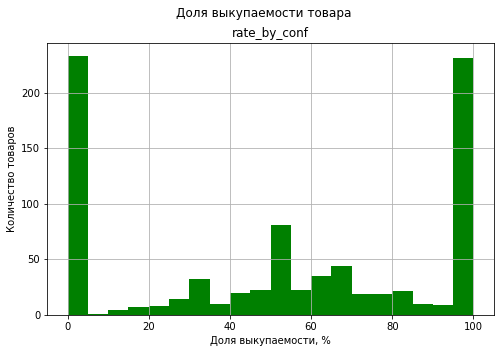

In [22]:
good.pivot_table(index='offer_id', values='rate_by_conf')\
.sort_values(by='rate_by_conf').hist(bins=20, figsize=(8,5), color='green')
plt.suptitle('Доля выкупаемости товара')
plt.ylabel('Количество товаров')
plt.xlabel('Доля выкупаемости, %');

In [23]:
good['rate_by_conf'].describe()

count    2701.000000
mean       55.046061
std        43.136618
min         0.000000
25%         0.000000
50%        60.000000
75%       100.000000
max       100.000000
Name: rate_by_conf, dtype: float64

Пусть 20% будет границей между низкой и нормальной выкупаемостью товара

In [24]:
good.pivot_table(index='offer_id', values='rate_by_conf').sort_values(by='rate_by_conf').query('rate_by_conf < 20')

,rate_by_conf
offer_id,
5756672,0.000000
5784236,0.000000
4973321,0.000000
4976249,0.000000
5025659,0.000000
...,...
5452196,16.666667
5447705,16.666667
5596397,16.666667


Предложите по какому принципу увеличивать (понижать) бюджет на эффективные(неэффективные) товары, например, коэффициент зависящий от какого-либо показателя или нескольких показателей

In [25]:
data.head()

,store_id,offer_id,cost,revenue_value,revenue_value_conf,profit,crr,crr_conf,roas,roas_conf,romi
0,77107113,1456613,110.88,2232.00,0.0,0.000000,4.967742,inf,20.129870,0.000000,0.000000
1,77107113,1497759,4207.68,112302.56,89471.6,588.586800,3.746736,4.702811,26.689900,21.263879,13.988393
2,77107113,1537663,501.84,2148.00,2148.0,428.243153,23.363128,23.363128,4.280249,4.280249,85.334599
3,77107113,1695942,1293.84,6840.00,6840.0,1210.010045,18.915789,18.915789,5.286589,5.286589,93.520841
4,77107113,1901080,156.24,7555.80,6476.4,2711.312597,2.067815,2.412451,48.360215,41.451613,1735.351124


Можно применить равновесную модель по столбцам `roas`, `roas_conf`, `romi`. Итоговый показатель использовать как маркер: чем он выше, тем прибыльнее товар, следовательно расходы на его рекламу можно увеличить.  